# Multiple Linear Regression

## Bike Sharing Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Reading & Understanding data

In [2]:
#Loading data set
bi = pd.read_csv('day.csv')
bi.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [419]:
bi.shape

(730, 16)

In [420]:
#Check missing value
bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### No missing value - all are no-null

In [421]:
bi.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the Data - EDA

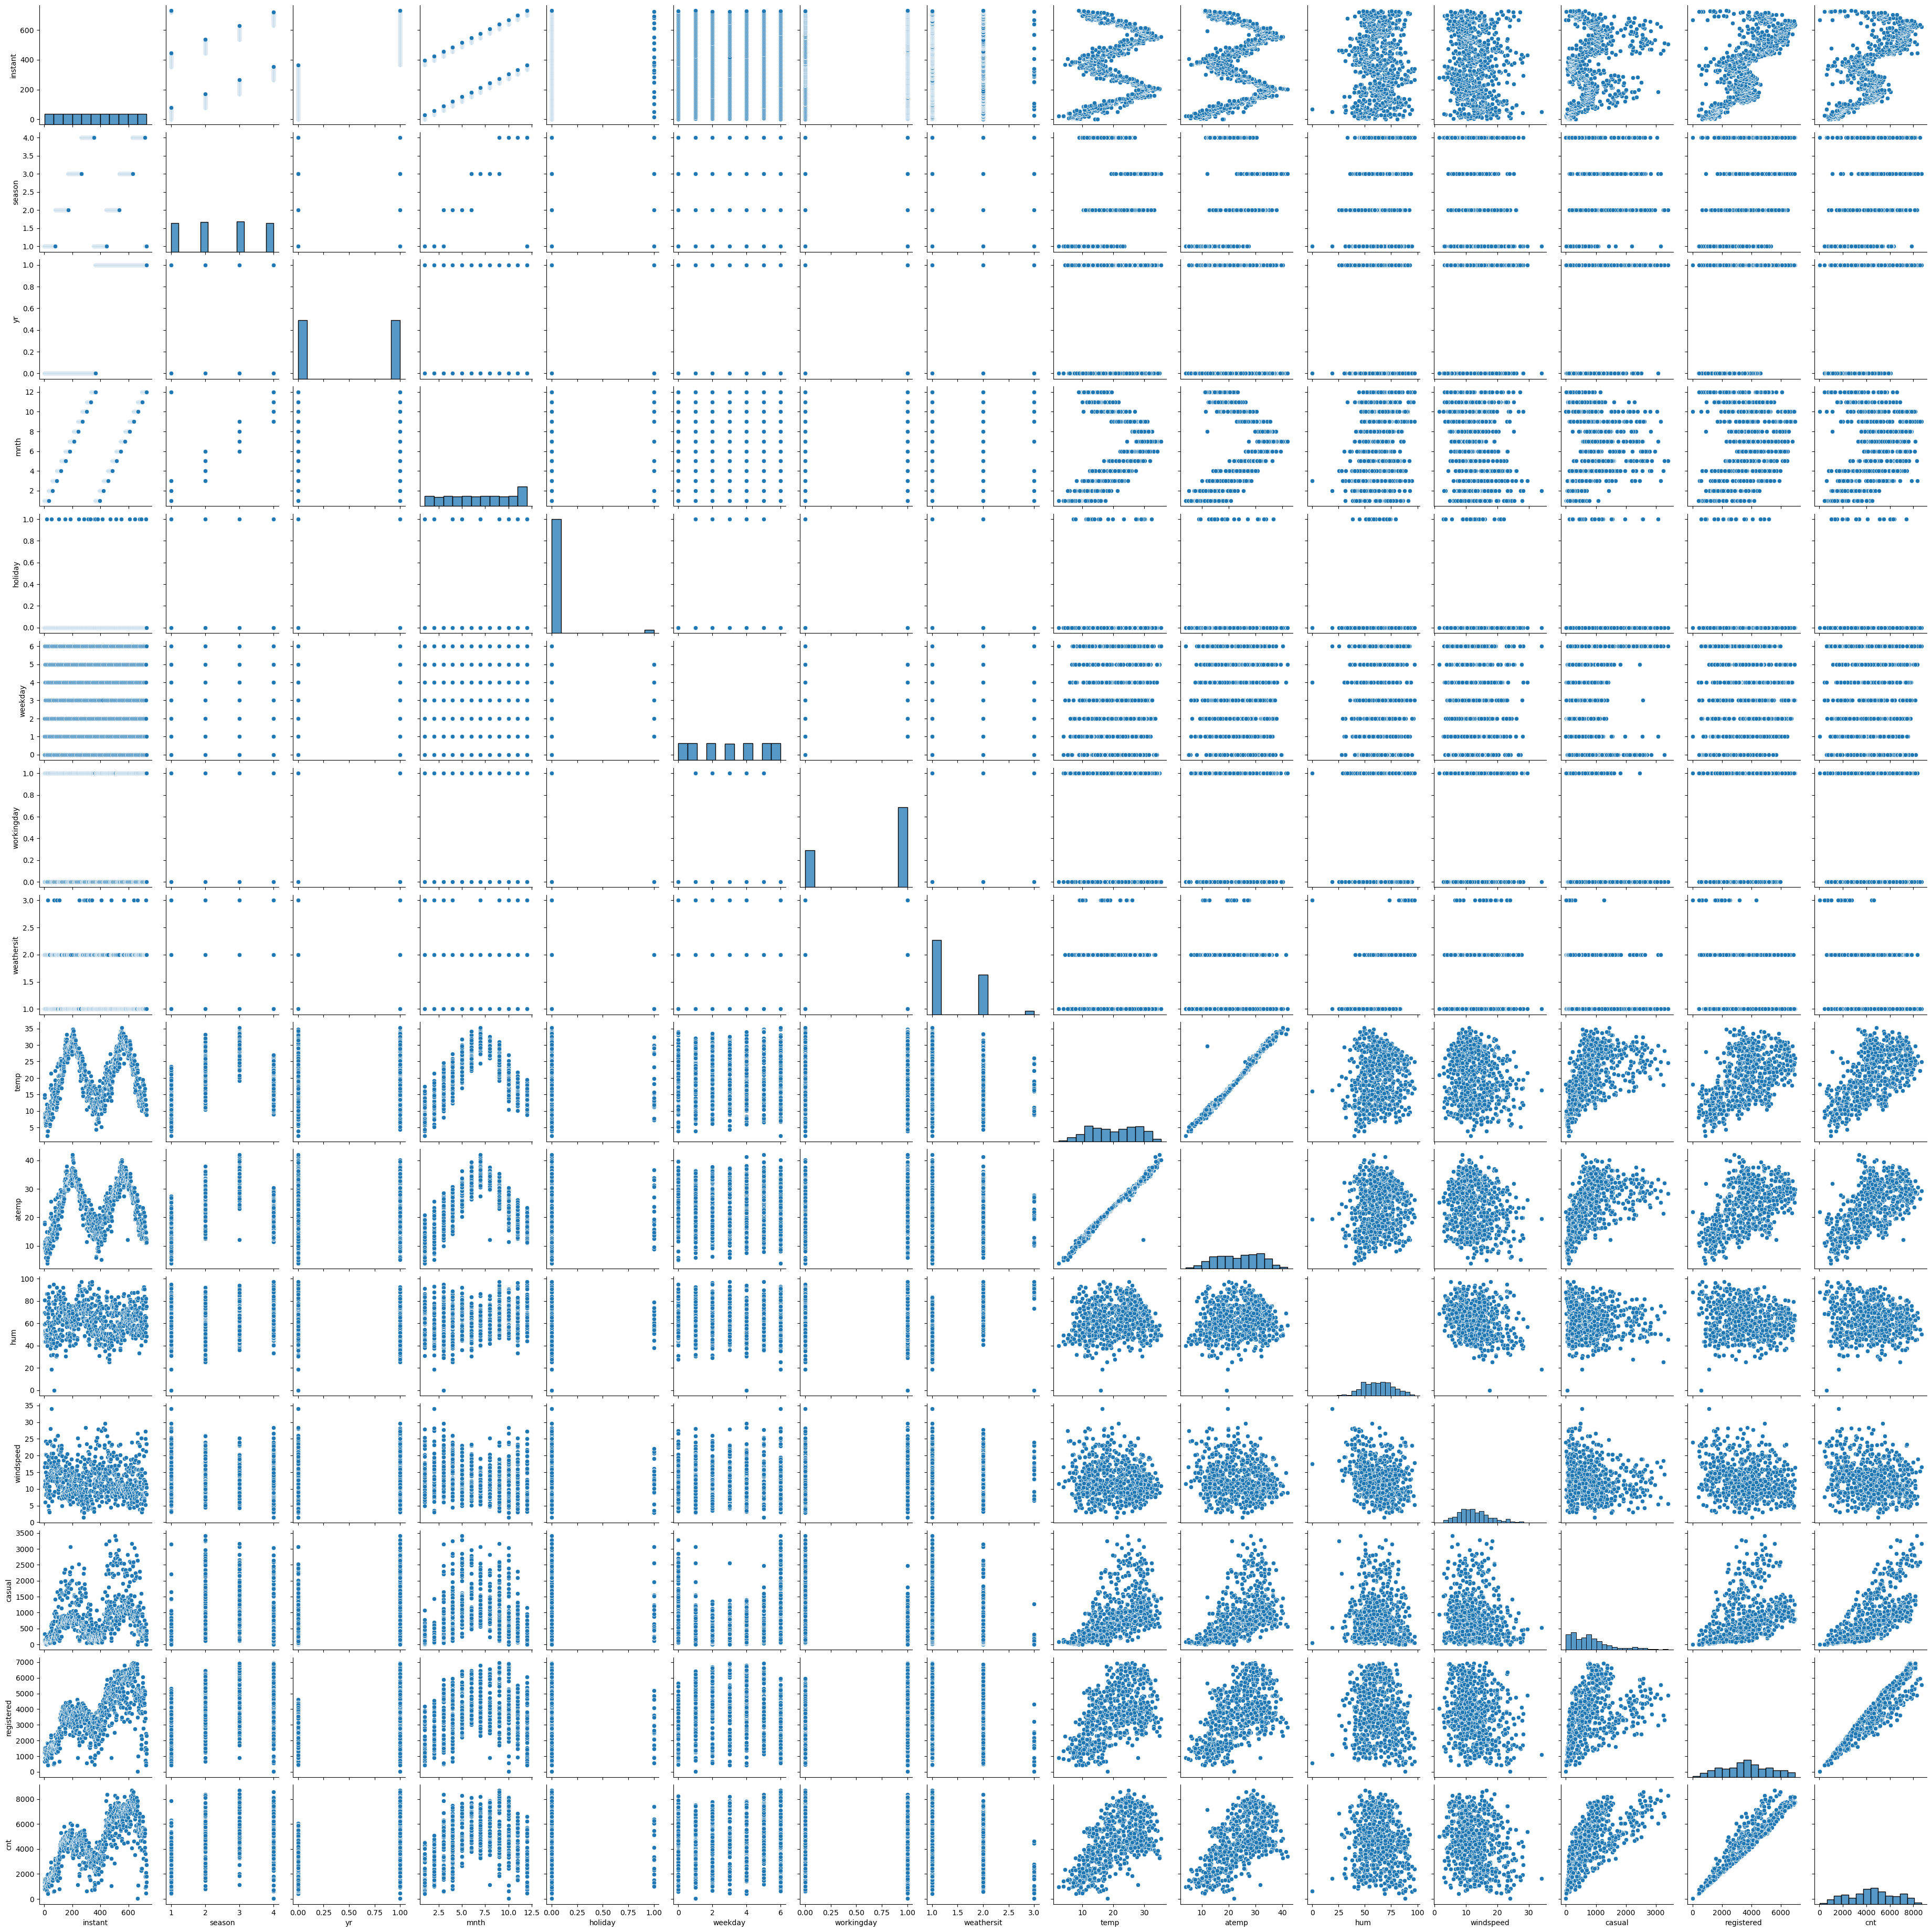

In [318]:
# visualizing numeric variables
sns.pairplot(bi)
plt.show()

<Figure size 1500x3000 with 0 Axes>

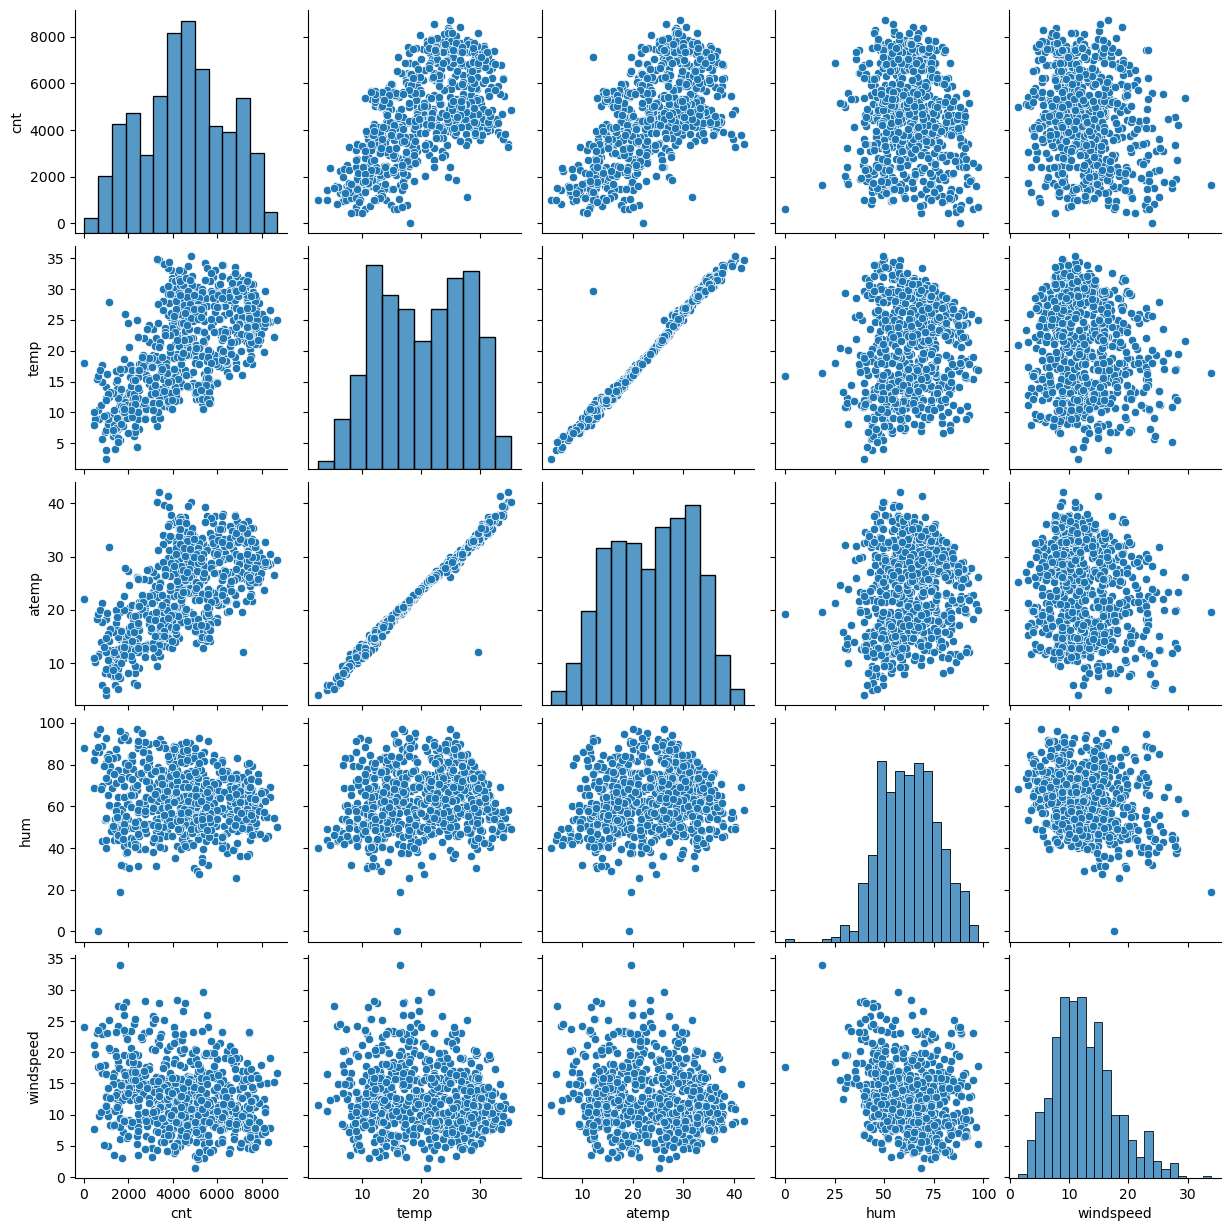

In [422]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bi,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

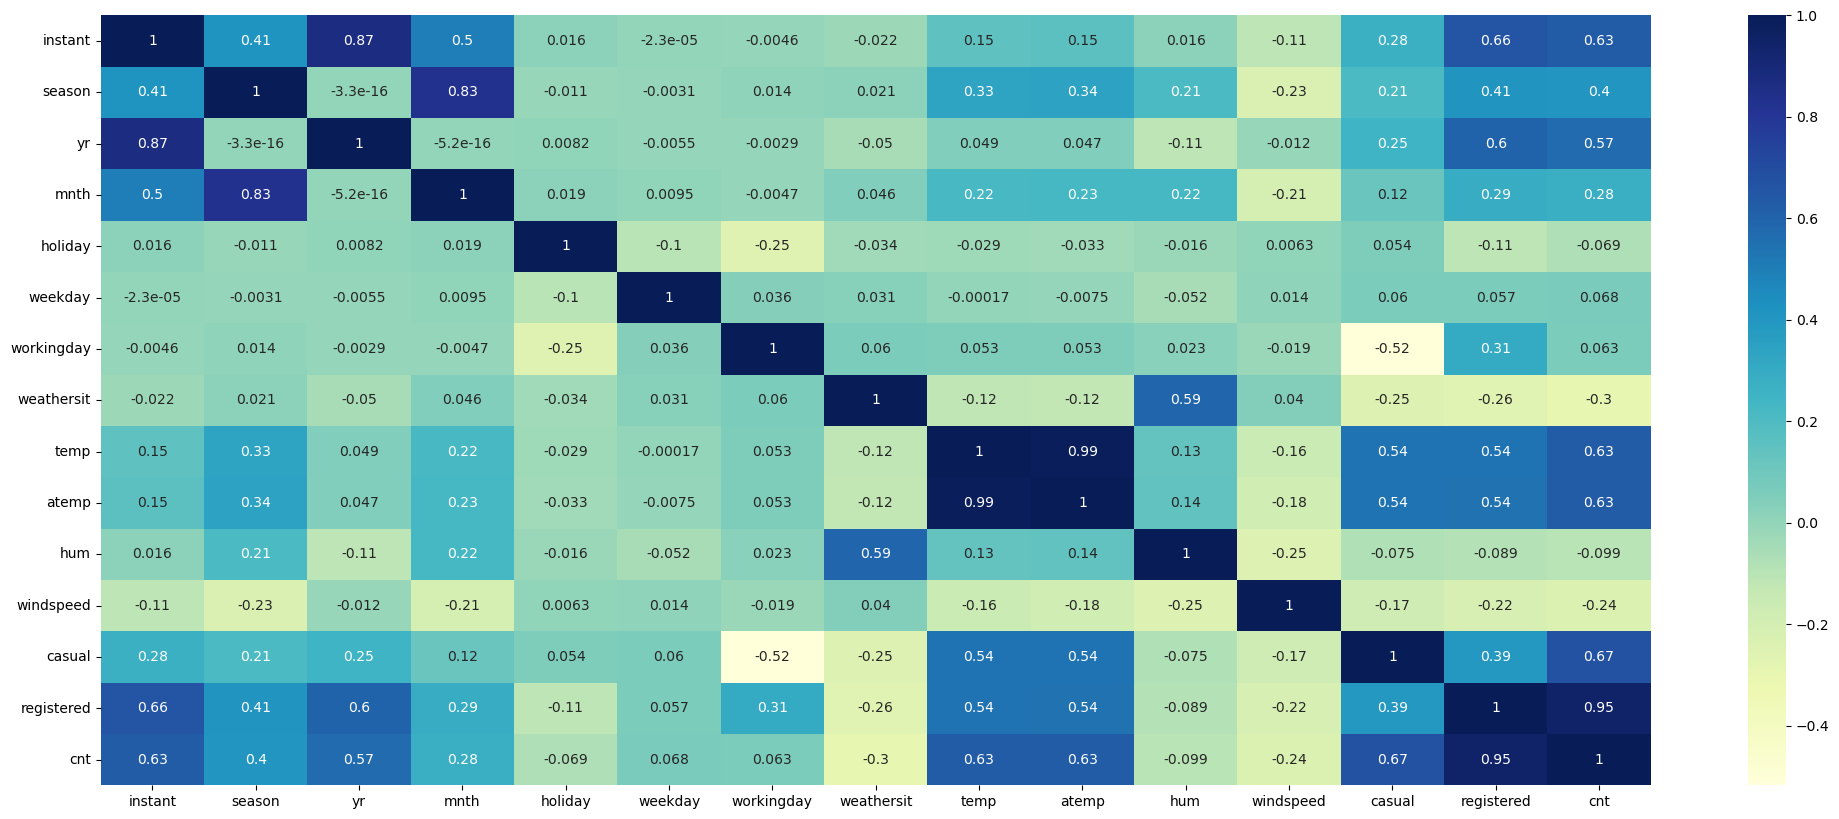

In [423]:
#Calculate Correlation and draw Heatmap of correlation
corr = bi.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### From the correlation map, temp, atemp and days_old seems to be highly correlated 

### Univariant Analysis

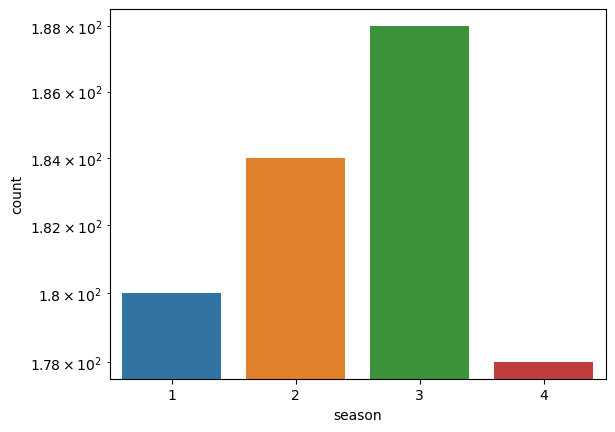

In [424]:
#Countplot
sns.countplot(x='season',data=bi)
plt.yscale('log')

#### {1 : 'season_spring', 2 : 'season_summar', 3: 'season_fall', 4 : 'season_winter'})
  -In fall season more demand for bike is there

### Bivariant & Multi varient analysis - boxplot

<Axes: xlabel='mnth', ylabel='cnt'>

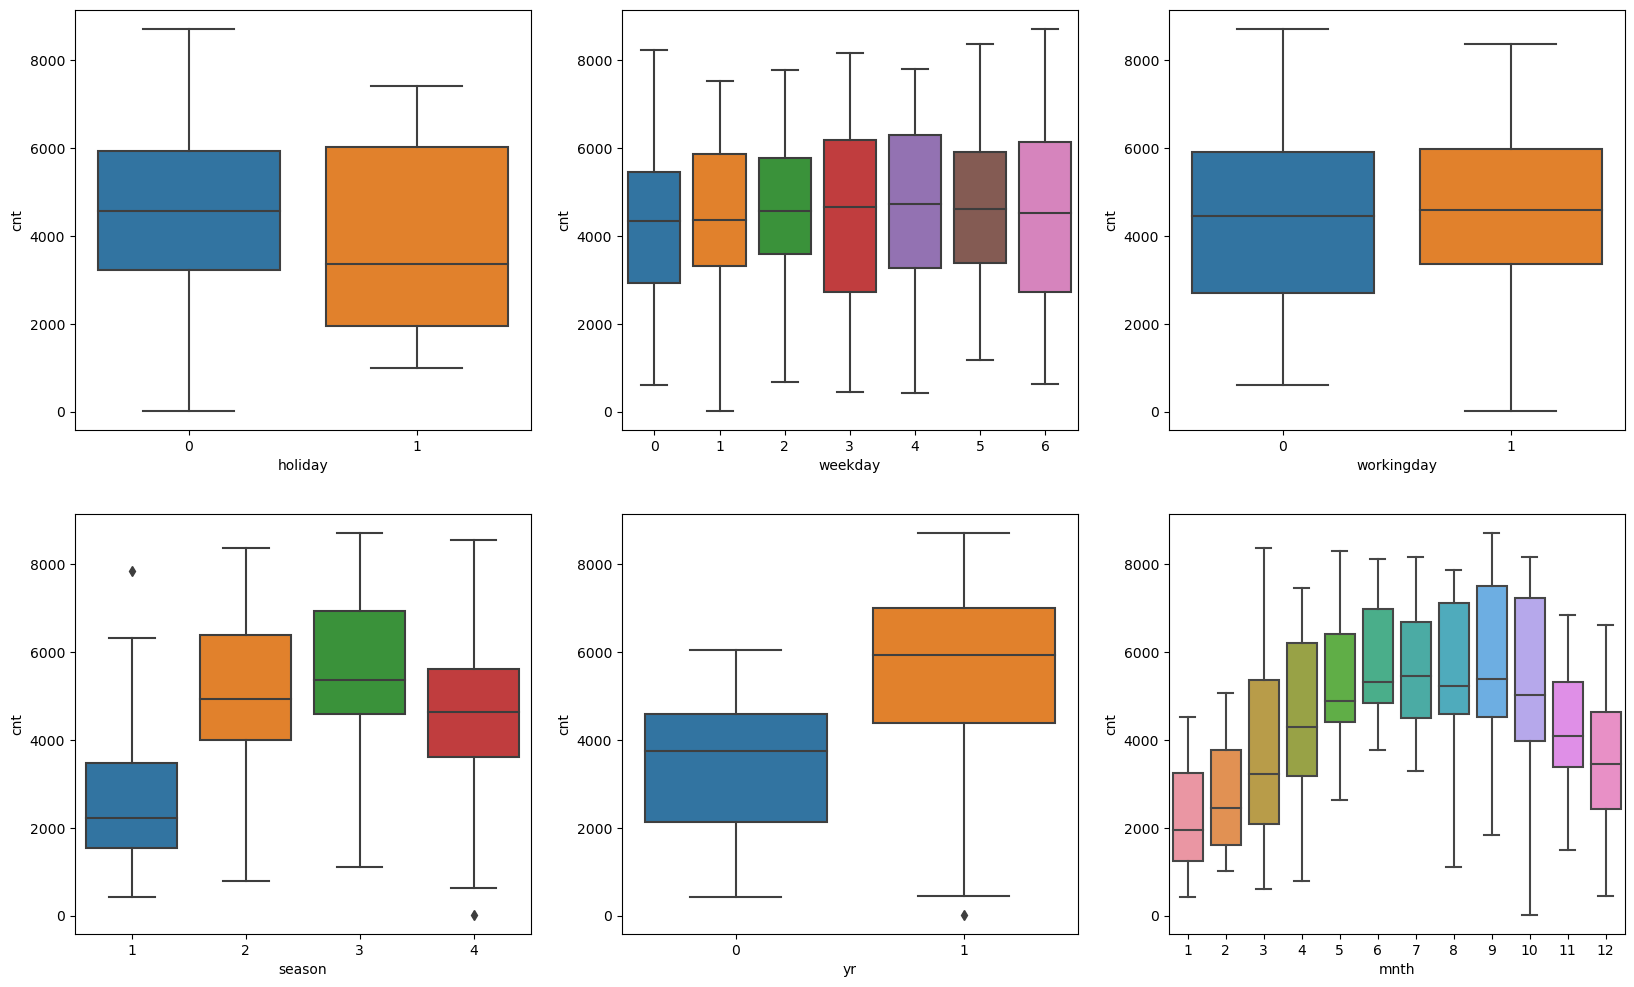

In [425]:
#Visualising Categorical Variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x ='holiday', y='cnt', data=bi)
plt.subplot(2,3,2)
sns.boxplot(x ='weekday', y='cnt', data=bi)
plt.subplot(2,3,3)
sns.boxplot(x ='workingday', y='cnt', data=bi)
plt.subplot(2,3,4)
sns.boxplot(x ='season', y='cnt', data=bi)
plt.subplot(2,3,5)
sns.boxplot(x ='yr', y='cnt', data=bi)
plt.subplot(2,3,6)
sns.boxplot(x ='mnth', y='cnt', data=bi)

### Preparing Data for Modelling

In [426]:
#Remove casual & reg - not features
bi = bi.drop(['dteday','casual','registered','instant'], axis=1)
bi.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [427]:
#Map categorical variables - season
bi['season'] = bi['season'].map({1 : 'season_spring', 2 : 'season_summar', 3: 'season_fall', 4 : 'season_winter'})

#Map categorical variables - weekday
bi['weekday'] = bi['weekday'].map({0: 'week_sun', 1 : 'week_mon', 2 : 'week_tue', 3: 'week_wed', 4 : 'week_thu', 5 : 'week_fri', 6 : 'week_sat'})

# Map categorical variables - weathersit
bi['weathersit'] = bi['weathersit'].map({ 1 : 'wea_cloudy', 2 : 'wea_mist', 3: 'wea_snow', 4 : 'wea_rain'})

#Map categorical variables - month
bi['mnth'] = bi['mnth'].map({1: 'mt_jan', 2 : 'mt_feb', 3 : 'mt_mar', 4: 'mt_apr', 5 : 'mt_may', 6 : 'mt_jun', 7: 'mt_jul', 8: 'mt_aug', 9 : 'mt_sep', 10 : 'mt_oct', 11: 'mt_nov', 12 : 'mt_dec'})

bi.head()

season  yr    mnth  holiday   weekday  workingday  weathersit  \
0  season_spring   0  mt_jan        0  week_sat           0    wea_mist   
1  season_spring   0  mt_jan        0  week_sun           0    wea_mist   
2  season_spring   0  mt_jan        0  week_mon           1  wea_cloudy   
3  season_spring   0  mt_jan        0  week_tue           1  wea_cloudy   
4  season_spring   0  mt_jan        0  week_wed           1  wea_cloudy   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600

In [428]:
# creating dummy variable for season
dumy_season = pd.get_dummies(bi['season'])

# dropping dummy var - fall
dumy_season = pd.get_dummies(bi['season'], drop_first=True)

# Concat dummy with original
bi = pd.concat([bi, dumy_season], axis=1)

# drop redudant var - season
bi = bi.drop('season', axis=1)
bi.head()

yr    mnth  holiday   weekday  workingday  weathersit       temp     atemp  \
0   0  mt_jan        0  week_sat           0    wea_mist  14.110847  18.18125   
1   0  mt_jan        0  week_sun           0    wea_mist  14.902598  17.68695   
2   0  mt_jan        0  week_mon           1  wea_cloudy   8.050924   9.47025   
3   0  mt_jan        0  week_tue           1  wea_cloudy   8.200000  10.60610   
4   0  mt_jan        0  week_wed           1  wea_cloudy   9.305237  11.46350   

       hum  windspeed   cnt  season_spring  season_summar  season_winter  
0  80.5833  10.749882   985              1              0              0  
1  69.6087  16.652113   801              1              0              0  
2  43.7273  16.636703  1349              1              0              0  
3  59.0435  10.739832  1562              1              0              0  
4  43.6957  12.522300  1600              1              0              0

In [429]:
# creating dummy variable for weekday
dummy_weekday = pd.get_dummies(bi['weekday'])

# dropping dummy var - 0
dummy_weekday = pd.get_dummies(bi['weekday'], drop_first=True)

# Concat dummy with original
bi = pd.concat([bi, dummy_weekday], axis=1)

# drop redudant var - weathersit
bi = bi.drop('weekday', axis=1)

bi.head()

yr    mnth  holiday  workingday  weathersit       temp     atemp      hum  \
0   0  mt_jan        0           0    wea_mist  14.110847  18.18125  80.5833   
1   0  mt_jan        0           0    wea_mist  14.902598  17.68695  69.6087   
2   0  mt_jan        0           1  wea_cloudy   8.050924   9.47025  43.7273   
3   0  mt_jan        0           1  wea_cloudy   8.200000  10.60610  59.0435   
4   0  mt_jan        0           1  wea_cloudy   9.305237  11.46350  43.6957   

   windspeed   cnt  season_spring  season_summar  season_winter  week_mon  \
0  10.749882   985              1              0              0         0   
1  16.652113   801              1              0              0         0   
2  16.636703  1349              1              0              0         1   
3  10.739832  1562              1              0              0         0   
4  12.522300  1600              1              0              0         0   

   week_sat  week_sun  week_thu  week_tue  week_wed  
0         1         0         0         0         0  
1         0         1         0         0         0  
2         0         0         0         0         0  
3         0         0         0         1         0  
4         0         0         0         0         1

In [430]:
# creating dummy variable for weathersit
dummy_weathersit = pd.get_dummies(bi['weathersit'])

# dropping 1 dummy var
dummy_weathersit = pd.get_dummies(bi['weathersit'], drop_first=True)

# Concat dummy with original
bi = pd.concat([bi, dummy_weathersit], axis=1)

# drop redudant var - weathersit
bi = bi.drop('weathersit', axis=1)
bi.head()

yr    mnth  holiday  workingday       temp     atemp      hum  windspeed  \
0   0  mt_jan        0           0  14.110847  18.18125  80.5833  10.749882   
1   0  mt_jan        0           0  14.902598  17.68695  69.6087  16.652113   
2   0  mt_jan        0           1   8.050924   9.47025  43.7273  16.636703   
3   0  mt_jan        0           1   8.200000  10.60610  59.0435  10.739832   
4   0  mt_jan        0           1   9.305237  11.46350  43.6957  12.522300   

    cnt  season_spring  season_summar  season_winter  week_mon  week_sat  \
0   985              1              0              0         0         1   
1   801              1              0              0         0         0   
2  1349              1              0              0         1         0   
3  1562              1              0              0         0         0   
4  1600              1              0              0         0         0   

   week_sun  week_thu  week_tue  week_wed  wea_mist  wea_snow  
0         0         0         0         0         1         0  
1         1         0         0         0         1         0  
2         0         0         0         0         0         0  
3         0         0         1         0         0         0  
4         0         0         0         1         0         0

In [431]:
# creating dummy variable for mnth
dummy_mnth = pd.get_dummies(bi['mnth'])

# dropping 1 dummy var
dummy_mnth = pd.get_dummies(bi['mnth'], drop_first=True)

# Concat dummy with original
bi = pd.concat([bi, dummy_mnth], axis=1)

# drop redudant var - weathersit
bi = bi.drop('mnth', axis=1)
bi.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summar  ...  mt_dec  mt_feb  mt_jan  mt_jul  mt_jun  \
0              1              0  ...       0       0       1       0       0   
1              1              0  ...       0       0       1       0       0   
2              1              0  ...       0       0       1       0       0   
3              1              0  ...       0       0       1       0       0   
4              1              0  ...       0       0       1       0       0   

   mt_mar  mt_may  mt_nov  mt_oct  mt_sep  
0       0       0       0       0       0  
1       0       0       0       0       0  
2       0       0       0       0       0  
3       0       0       0       0       0  
4       0       0       0       0       0  

[5 rows x 30 columns]

### Splitting the Data into Training and Testing Sets

In [432]:
df_train, df_test = train_test_split(bi, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling

In [433]:
#Instantiate object
sc = MinMaxScaler()
#List of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
#Fit on data
df_train[num_vars] = sc.fit_transform(df_train[num_vars])
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686  7216   
426   1        0           0  0.442393  0.438975  0.640189   0.255342  4066   
728   1        0           0  0.245101  0.200348  0.498067   0.663106  1796   
482   1        0           0  0.395666  0.391735  0.504508   0.188475  4220   
111   0        0           1  0.345824  0.318819  0.751824   0.380981  1683   

     season_spring  season_summar  ...  mt_dec  mt_feb  mt_jan  mt_jul  \
576              0              0  ...       0       0       0       1   
426              1              0  ...       0       0       0       0   
728              1              0  ...       1       0       0       0   
482              0              1  ...       0       0       0       0   
111              0              1  ...       0       0       0       0   

     mt_jun  mt_mar  mt_may  mt_nov  mt_oct  mt_sep  
576       0       0       0       0       0       0  
426       0       1       0       0       0       0  
728       0       0       0       0       0       0  
482       0       0       0       0       0       0  
111       0       0       0       0       0       0  

[5 rows x 30 columns]

### Dividing X and y data set for modal building

In [434]:
y_train = df_train.pop('cnt')
X_train = df_train

In [435]:
print(y_train.head())
print(X_train.head())

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64
     yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

     season_spring  season_summar  season_winter  ...  mt_dec  mt_feb  mt_jan  \
576              0              0              0  ...       0       0       0   
426              1              0              0  ...       0       0       0   
728              1              0              0  ...       1       0       0   
482              0              1              0  ...       0       0       0   
111              0              1              0  ...       0       0   

## Building Model

### Adding All Variables to the model

In [436]:
bi.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summar', 'season_winter', 'week_mon',
       'week_sat', 'week_sun', 'week_thu', 'week_tue', 'week_wed', 'wea_mist',
       'wea_snow', 'mt_aug', 'mt_dec', 'mt_feb', 'mt_jan', 'mt_jul', 'mt_jun',
       'mt_mar', 'mt_may', 'mt_nov', 'mt_oct', 'mt_sep'],
      dtype='object')

### Build the model with all variables

In [437]:
#Build Model 1
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.81e-180
Time:                        14:06:59   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2132.3460    307.054      6.945      0.000    1529.012    2735.680
yr             2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday          99.0718    209.894      0.472      0.637    -313.350     511.494
workingday      841.2011    106.806      7.876      0.000     631.337    1051.065
temp           3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp           513.2207   1203.335      0.426      0.670   -1851.222    2877.663
hum           -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed     -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_spring  -394.2228    260.924     -1.511      0.131    -906.915     118.469
season_summar   368.2736    227.759      1.617      0.107     -79.252     815.799
season_winter   930.7444    243.295      3.826      0.000     452.692    1408.796
week_mon       -187.9576    134.168     -1.401      0.162    -451.584      75.669
week_sat        831.6716    119.718      6.947      0.000     596.437    1066.906
week_sun        360.4014    121.552      2.965      0.003     121.563     599.240
week_thu        -84.5755    135.742     -0.623      0.534    -351.295     182.144
week_tue       -160.2692    135.333     -1.184      0.237    -426.187     105.649
week_wed        -51.2569    130.031     -0.394      0.694    -306.756     204.243
wea_mist       -517.3529     90.743     -5.701      0.000    -695.654    -339.052
wea_snow      -2216.2460    230.125     -9.631      0.000   -2668.421   -1764.071
mt_aug          193.5713    294.433      0.657      0.511    -384.962     772.104
mt_dec         -384.8315    292.519     -1.316      0.189    -959.605     189.942
mt_feb         -280.8921    286.571     -0.980      0.327    -843.977     282.193
mt_jan         -548.1528    292.204     -1.876      0.061   -1122.307      26.002
mt_jul         -283.8506    304.748     -0.931      0.352    -882.652     314.951
mt_jun           52.2549    217.168      0.241      0.810    -374.460     478.970
mt_mar           13.5128    213.815      0.063      0.950    -406.614     433.639
mt_may          222.0003    183.818      1.208      0.228    -139.185     583.185
mt_nov         -346.1020    316.564     -1.093      0.275    -968.121     275.918
mt_oct           67.0449    312.229      0.215      0.830    -546.456     680.546
mt_sep          754.1233    278.215      2.711      0.007     207.456    1300.790
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.            

# VIF

In [438]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      workingday  85.56
3            temp  66.90
4           atemp  56.03
11       week_sat  19.71
12       week_sun  18.34
7   season_spring  10.77
9   season_winter   9.46
8   season_summar   8.29
26         mt_nov   6.79
27         mt_oct   6.47
18         mt_aug   6.47
21         mt_jan   5.90
19         mt_dec   5.68
22         mt_jul   5.64
28         mt_sep   4.92
1         holiday   4.51
20         mt_feb   4.39
24         mt_mar   3.47
23         mt_jun   2.86
25         mt_may   2.24
5             hum   2.05
10       week_mon   1.98
15       week_wed   1.94
13       week_thu   1.83
14       week_tue   1.80
16       wea_mist   1.60
17       wea_snow   1.30
6       windspeed   1.30
0              yr   1.06

### VIF 
    -High p-value, high VIF -> Drop the value
    -High-low
        -High p, low VIF : remove these first before below ones
        -Low p, high VIF : remove these after the ones above
    -Low p, low VIF -> Have this value

In [439]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('atemp', 1,)

In [440]:
#Build Model 2
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.00e-181
Time:                        14:07:01   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2130.6795    306.769      6.946      0.000    1527.910    2733.449
yr             2020.3471     70.106     28.819      0.000    1882.596    2158.098
holiday          91.6888    209.001      0.439      0.661    -318.977     502.355
workingday      840.3685    106.697      7.876      0.000     630.719    1050.018
temp           3871.0579    402.069      9.628      0.000    3081.034    4661.082
hum           -1316.6056    335.084     -3.929      0.000   -1975.011    -658.201
windspeed     -1616.8029    223.739     -7.226      0.000   -2056.426   -1177.179
season_spring  -389.6974    260.487     -1.496      0.135    -901.528     122.133
season_summar   373.7710    227.201      1.645      0.101     -72.655     820.197
season_winter   935.5337    242.829      3.853      0.000     458.399    1412.668
week_mon       -181.9322    133.308     -1.365      0.173    -443.869      80.005
week_sat        834.9522    119.369      6.995      0.000     600.404    1069.500
week_sun        363.6700    121.207      3.000      0.003     125.510     601.830
week_thu        -79.3632    135.075     -0.588      0.557    -344.773     186.046
week_tue       -155.8567    134.823     -1.156      0.248    -420.770     109.056
week_wed        -47.7634    129.663     -0.368      0.713    -302.538     207.011
wea_mist       -517.6165     90.664     -5.709      0.000    -695.761    -339.472
wea_snow      -2223.7163    229.263     -9.699      0.000   -2674.195   -1773.238
mt_aug          177.1104    291.644      0.607      0.544    -395.941     750.162
mt_dec         -384.8529    292.271     -1.317      0.189    -959.135     189.430
mt_feb         -281.9792    286.316     -0.985      0.325    -844.561     280.603
mt_jan         -550.3311    291.912     -1.885      0.060   -1123.908      23.245
mt_jul         -294.2054    303.521     -0.969      0.333    -890.594     302.183
mt_jun           40.0039    215.077      0.186      0.853    -382.600     462.608
mt_mar           11.0761    213.557      0.052      0.959    -408.541     430.694
mt_may          214.4581    182.810      1.173      0.241    -144.744     573.661
mt_nov         -346.6284    316.293     -1.096      0.274    -968.112     274.855
mt_oct           65.5898    311.945      0.210      0.834    -547.351     678.530
mt_sep          746.9719    277.473      2.692      0.007     201.765    1292.179
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.71e+15
================================================================

In [441]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      workingday  85.54
10       week_sat  19.71
11       week_sun  18.34
6   season_spring  10.75
8   season_winter   9.44
7   season_summar   8.27
3            temp   7.08
25         mt_nov   6.79
26         mt_oct   6.47
17         mt_aug   6.36
20         mt_jan   5.90
18         mt_dec   5.68
21         mt_jul   5.60
27         mt_sep   4.90
1         holiday   4.50
19         mt_feb   4.39
23         mt_mar   3.47
22         mt_jun   2.81
24         mt_may   2.22
4             hum   2.05
9        week_mon   1.96
14       week_wed   1.93
12       week_thu   1.81
13       week_tue   1.79
15       wea_mist   1.60
16       wea_snow   1.29
5       windspeed   1.24
0              yr   1.06

In [442]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('season_spring', 1,)

In [443]:
#Build Model 3
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.68e-182
Time:                        14:07:02   Log-Likelihood:                -4099.9
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     483   BIC:                             8368.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1937.3507    278.578      6.954      0.000    1389.976    2484.726
yr             2017.4092     70.168     28.751      0.000    1879.537    2155.282
holiday          39.4402    206.326      0.191      0.848    -365.968     444.848
workingday      796.7837    102.774      7.753      0.000     594.844     998.724
temp           3948.3221    399.249      9.889      0.000    3163.844    4732.801
hum           -1335.4223    335.276     -3.983      0.000   -1994.203    -676.642
windspeed     -1643.4990    223.312     -7.360      0.000   -2082.281   -1204.717
season_summar   595.9482    172.164      3.462      0.001     257.665     934.232
season_winter  1153.4738    194.526      5.930      0.000     771.251    1535.696
week_mon       -177.9806    133.453     -1.334      0.183    -440.200      84.239
week_sat        784.5602    114.665      6.842      0.000     559.257    1009.863
week_sun        316.5666    117.196      2.701      0.007      86.289     546.844
week_thu        -76.3740    135.234     -0.565      0.573    -342.093     189.345
week_tue       -156.7714    134.994     -1.161      0.246    -422.020     108.477
week_wed        -51.4106    129.806     -0.396      0.692    -306.465     203.643
wea_mist       -513.5797     90.739     -5.660      0.000    -691.872    -335.287
wea_snow      -2201.3411    229.068     -9.610      0.000   -2651.433   -1751.249
mt_aug          373.0401    260.918      1.430      0.153    -139.635     885.715
mt_dec         -422.4765    291.560     -1.449      0.148    -995.359     150.406
mt_feb         -434.0356    268.011     -1.619      0.106    -960.647      92.576
mt_jan         -698.0703    275.052     -2.538      0.011   -1238.516    -157.624
mt_jul         -103.1456    275.698     -0.374      0.708    -644.862     438.571
mt_jun           96.2946    212.031      0.454      0.650    -320.323     512.912
mt_mar          -91.1971    202.578     -0.450      0.653    -489.241     306.847
mt_may          201.1018    182.825      1.100      0.272    -158.130     560.333
mt_nov         -336.2160    316.621     -1.062      0.289    -958.342     285.910
mt_oct           65.1089    312.345      0.208      0.835    -548.613     678.831
mt_sep          902.8905    257.486      3.507      0.000     396.960    1408.821
==============================================================================
Omnibus:                       81.173   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.633
Skew:                          -0.783   Prob(JB):                     2.03e-48
Kurtosis:                       5.808   Cond. No.                     7.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [444]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      workingday  70.94
9        week_sat  16.17
10       week_sun  15.16
3            temp   6.97
24         mt_nov   6.78
25         mt_oct   6.47
7   season_winter   6.04
17         mt_dec   5.63
19         mt_jan   5.23
16         mt_aug   5.08
6   season_summar   4.73
20         mt_jul   4.61
26         mt_sep   4.21
1         holiday   3.91
18         mt_feb   3.84
22         mt_mar   3.12
21         mt_jun   2.73
23         mt_may   2.22
4             hum   2.05
8        week_mon   1.96
13       week_wed   1.93
11       week_thu   1.81
12       week_tue   1.79
14       wea_mist   1.60
15       wea_snow   1.29
5       windspeed   1.23
0              yr   1.06

In [445]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mt_oct', 1,)

In [446]:
#Build Model 4
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.32e-183
Time:                        14:07:03   Log-Likelihood:                -4100.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     484   BIC:                             8362.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1959.3221    257.613      7.606      0.000    1453.143    2465.501
yr             2016.8013     70.038     28.796      0.000    1879.185    2154.418
holiday          46.8846    203.011      0.231      0.817    -352.008     445.777
workingday      801.4589    100.198      7.999      0.000     604.582     998.336
temp           3945.3640    398.602      9.898      0.000    3162.160    4728.568
hum           -1326.9383    332.468     -3.991      0.000   -1980.197    -673.680
windspeed     -1643.1804    223.086     -7.366      0.000   -2081.516   -1204.845
season_summar   576.0330    143.082      4.026      0.000     294.895     857.171
season_winter  1178.2253    153.930      7.654      0.000     875.771    1480.679
week_mon       -178.3020    133.312     -1.337      0.182    -440.244      83.640
week_sat        789.5311    112.047      7.046      0.000     569.373    1009.689
week_sun        321.4476    114.720      2.802      0.005      96.037     546.858
week_thu        -76.0551    135.091     -0.563      0.574    -341.493     189.383
week_tue       -157.1052    134.851     -1.165      0.245    -422.071     107.861
week_wed        -51.4433    129.677     -0.397      0.692    -306.244     203.357
wea_mist       -514.0987     90.616     -5.673      0.000    -692.147    -336.050
wea_snow      -2200.1089    228.765     -9.617      0.000   -2649.604   -1750.614
mt_aug          343.5007    218.866      1.569      0.117     -86.544     773.545
mt_dec         -470.9417    175.754     -2.680      0.008    -816.277    -125.606
mt_feb         -464.6131    224.083     -2.073      0.039    -904.908     -24.318
mt_jan         -729.0482    231.220     -3.153      0.002   -1183.368    -274.729
mt_jul         -132.2505    237.493     -0.557      0.578    -598.896     334.395
mt_jun           79.9024    196.715      0.406      0.685    -306.619     466.424
mt_mar         -114.2864    169.447     -0.674      0.500    -447.228     218.655
mt_may          190.6315    175.616      1.085      0.278    -154.433     535.696
mt_nov         -391.9711    169.267     -2.316      0.021    -724.560     -59.383
mt_sep          866.9399    191.004      4.539      0.000     491.640    1242.240
==============================================================================
Omnibus:                       80.490   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.047
Skew:                          -0.777   Prob(JB):                     7.39e-48
Kurtosis:                       5.792   Cond. No.                     7.16e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.04e-29. This mig

In [447]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      workingday  61.45
9        week_sat  13.95
10       week_sun  13.12
3            temp   6.96
7   season_winter   3.79
19         mt_jan   3.70
16         mt_aug   3.58
1         holiday   3.47
20         mt_jul   3.43
6   season_summar   3.28
18         mt_feb   2.69
21         mt_jun   2.35
25         mt_sep   2.32
22         mt_mar   2.18
23         mt_may   2.05
17         mt_dec   2.05
4             hum   2.02
8        week_mon   1.96
24         mt_nov   1.94
13       week_wed   1.93
11       week_thu   1.81
12       week_tue   1.79
14       wea_mist   1.60
15       wea_snow   1.29
5       windspeed   1.23
0              yr   1.05

In [448]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('holiday', 1,)

In [449]:
#Build Model 5
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     111.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.32e-183
Time:                        14:07:04   Log-Likelihood:                -4100.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     484   BIC:                             8362.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2006.2067    397.946      5.041      0.000    1224.291    2788.122
yr             2016.8013     70.038     28.796      0.000    1879.185    2154.418
workingday      754.5744    231.136      3.265      0.001     300.421    1208.727
temp           3945.3640    398.602      9.898      0.000    3162.160    4728.568
hum           -1326.9383    332.468     -3.991      0.000   -1980.197    -673.680
windspeed     -1643.1804    223.086     -7.366      0.000   -2081.516   -1204.845
season_summar   576.0330    143.082      4.026      0.000     294.895     857.171
season_winter  1178.2253    153.930      7.654      0.000     875.771    1480.679
week_mon       -178.3020    133.312     -1.337      0.182    -440.244      83.640
week_sat        742.6465    261.979      2.835      0.005     227.890    1257.403
week_sun        274.5630    262.646      1.045      0.296    -241.504     790.630
week_thu        -76.0551    135.091     -0.563      0.574    -341.493     189.383
week_tue       -157.1052    134.851     -1.165      0.245    -422.071     107.861
week_wed        -51.4433    129.677     -0.397      0.692    -306.244     203.357
wea_mist       -514.0987     90.616     -5.673      0.000    -692.147    -336.050
wea_snow      -2200.1089    228.765     -9.617      0.000   -2649.604   -1750.614
mt_aug          343.5007    218.866      1.569      0.117     -86.544     773.545
mt_dec         -470.9417    175.754     -2.680      0.008    -816.277    -125.606
mt_feb         -464.6131    224.083     -2.073      0.039    -904.908     -24.318
mt_jan         -729.0482    231.220     -3.153      0.002   -1183.368    -274.729
mt_jul         -132.2505    237.493     -0.557      0.578    -598.896     334.395
mt_jun           79.9024    196.715      0.406      0.685    -306.619     466.424
mt_mar         -114.2864    169.447     -0.674      0.500    -447.228     218.655
mt_may          190.6315    175.616      1.085      0.278    -154.433     535.696
mt_nov         -391.9711    169.267     -2.316      0.021    -724.560     -59.383
mt_sep          866.9399    191.004      4.539      0.000     491.640    1242.240
==============================================================================
Omnibus:                       80.490   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.047
Skew:                          -0.777   Prob(JB):                     7.39e-48
Kurtosis:                       5.792   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [450]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2            temp  37.78
3             hum  36.37
1      workingday  20.73
8        week_sat   6.00
9        week_sun   5.66
4       windspeed   4.96
6   season_winter   4.76
5   season_summar   3.99
15         mt_aug   3.95
19         mt_jul   3.71
18         mt_jan   2.99
20         mt_jun   2.54
24         mt_sep   2.49
13       wea_mist   2.38
12       week_wed   2.26
17         mt_feb   2.23
22         mt_may   2.22
7        week_mon   2.16
0              yr   2.14
21         mt_mar   2.12
10       week_thu   2.04
11       week_tue   2.03
16         mt_dec   1.94
23         mt_nov   1.93
14       wea_snow   1.30

In [451]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('week_wed', 1,)

In [452]:
#Build Model 6
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.25e-184
Time:                        14:07:05   Log-Likelihood:                -4100.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     485   BIC:                             8356.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1985.4430    394.146      5.037      0.000    1210.998    2759.888
yr             2016.3907     69.970     28.818      0.000    1878.910    2153.872
workingday      751.7163    230.822      3.257      0.001     298.181    1205.252
temp           3944.1139    398.243      9.904      0.000    3161.619    4726.608
hum           -1332.7957    331.851     -4.016      0.000   -1984.839    -680.752
windspeed     -1643.2964    222.891     -7.373      0.000   -2081.249   -1205.344
season_summar   574.9691    142.932      4.023      0.000     294.126     855.812
season_winter  1178.3851    153.796      7.662      0.000     876.197    1480.574
week_mon       -150.0327    112.570     -1.333      0.183    -371.217      71.152
week_sat        768.2204    253.703      3.028      0.003     269.728    1266.712
week_sun        300.2650    254.308      1.181      0.238    -199.417     799.947
week_thu        -47.2659    113.844     -0.415      0.678    -270.955     176.423
week_tue       -128.6394    114.076     -1.128      0.260    -352.783      95.504
wea_mist       -511.7410     90.342     -5.664      0.000    -689.251    -334.231
wea_snow      -2206.1548    228.058     -9.674      0.000   -2654.259   -1758.050
mt_aug          343.8895    218.673      1.573      0.116     -85.774     773.554
mt_dec         -470.8220    175.601     -2.681      0.008    -815.855    -125.789
mt_feb         -465.4202    223.879     -2.079      0.038    -905.312     -25.529
mt_jan         -730.7428    230.980     -3.164      0.002   -1184.588    -276.898
mt_jul         -130.3196    237.237     -0.549      0.583    -596.459     335.820
mt_jun           78.1939    196.497      0.398      0.691    -307.897     464.285
mt_mar         -115.3101    169.280     -0.681      0.496    -447.922     217.302
mt_may          190.1539    175.460      1.084      0.279    -154.601     534.909
mt_nov         -394.9128    168.957     -2.337      0.020    -726.892     -62.934
mt_sep          865.5552    190.807      4.536      0.000     490.646    1240.465
==============================================================================
Omnibus:                       79.985   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.812
Skew:                          -0.772   Prob(JB):                     1.37e-47
Kurtosis:                       5.787   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [453]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2            temp  37.58
3             hum  36.00
1      workingday  20.37
8        week_sat   5.73
9        week_sun   5.41
4       windspeed   4.95
6   season_winter   4.75
5   season_summar   3.97
14         mt_aug   3.95
18         mt_jul   3.71
17         mt_jan   2.96
19         mt_jun   2.54
23         mt_sep   2.49
12       wea_mist   2.36
16         mt_feb   2.22
21         mt_may   2.22
0              yr   2.14
20         mt_mar   2.11
15         mt_dec   1.93
22         mt_nov   1.91
7        week_mon   1.57
11       week_tue   1.47
10       week_thu   1.47
13       wea_snow   1.29

In [454]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mt_jun', 1,)

In [455]:
#Build Model 7
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.01e-185
Time:                        14:07:05   Log-Likelihood:                -4100.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     486   BIC:                             8350.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1977.3836    393.285      5.028      0.000    1204.636    2750.132
yr             2013.8412     69.615     28.928      0.000    1877.057    2150.625
workingday      759.7156    229.746      3.307      0.001     308.297    1211.134
temp           4027.5265    338.322     11.904      0.000    3362.772    4692.281
hum           -1351.4752    328.230     -4.117      0.000   -1996.400    -706.550
windspeed     -1655.1721    220.693     -7.500      0.000   -2088.803   -1221.541
season_summar   572.5671    142.681      4.013      0.000     292.219     852.915
season_winter  1159.0357    145.781      7.951      0.000     872.598    1445.474
week_mon       -148.8476    112.433     -1.324      0.186    -369.762      72.067
week_sat        777.2948    252.457      3.079      0.002     281.253    1273.336
week_sun        308.7578    253.192      1.219      0.223    -188.728     806.243
week_thu        -47.7396    113.740     -0.420      0.675    -271.222     175.742
week_tue       -129.5313    113.955     -1.137      0.256    -353.436      94.374
wea_mist       -509.4867     90.086     -5.656      0.000    -686.493    -332.481
wea_snow      -2204.0828    227.801     -9.675      0.000   -2651.680   -1756.485
mt_aug          292.9887    177.207      1.653      0.099     -55.197     641.175
mt_dec         -469.0031    175.390     -2.674      0.008    -813.618    -124.388
mt_feb         -472.9964    222.874     -2.122      0.034    -910.913     -35.080
mt_jan         -732.8220    230.721     -3.176      0.002   -1186.155    -279.489
mt_jul         -186.5200    190.454     -0.979      0.328    -560.736     187.696
mt_mar         -132.8213    163.318     -0.813      0.416    -453.719     188.076
mt_may          155.2518    151.834      1.023      0.307    -143.080     453.584
mt_nov         -391.3958    168.580     -2.322      0.021    -722.631     -60.160
mt_sep          828.8482    166.883      4.967      0.000     500.946    1156.750
==============================================================================
Omnibus:                       79.210   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.899
Skew:                          -0.769   Prob(JB):                     1.60e-46
Kurtosis:                       5.749   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  34.90
2            temp  25.76
1      workingday  20.26
8        week_sat   5.70
9        week_sun   5.38
4       windspeed   4.82
6   season_winter   4.21
5   season_summar   3.96
17         mt_jan   2.95
14         mt_aug   2.59
18         mt_jul   2.39
12       wea_mist   2.35
16         mt_feb   2.18
0              yr   2.12
19         mt_mar   1.93
15         mt_dec   1.93
21         mt_nov   1.91
22         mt_sep   1.88
20         mt_may   1.67
7        week_mon   1.57
10       week_thu   1.47
11       week_tue   1.47
13       wea_snow   1.29

In [457]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('week_thu', 1,)

In [458]:
#Build Model 8
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.66e-186
Time:                        14:07:06   Log-Likelihood:                -4100.2
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     487   BIC:                             8344.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1959.5272    390.646      5.016      0.000    1191.968    2727.087
yr             2013.8512     69.556     28.953      0.000    1877.183    2150.519
workingday      763.0806    229.412      3.326      0.001     312.321    1213.840
temp           4025.0289    337.983     11.909      0.000    3360.943    4689.115
hum           -1349.6110    327.922     -4.116      0.000   -1993.928    -705.294
windspeed     -1655.5393    220.505     -7.508      0.000   -2088.797   -1222.281
season_summar   572.6894    142.560      4.017      0.000     292.581     852.798
season_winter  1160.0322    145.638      7.965      0.000     873.876    1446.189
week_mon       -133.4291    106.173     -1.257      0.209    -342.042      75.184
week_sat        795.7914    248.371      3.204      0.001     307.781    1283.802
week_sun        327.0337    249.208      1.312      0.190    -162.623     816.690
week_tue       -114.7218    108.263     -1.060      0.290    -327.442      97.999
wea_mist       -507.7526     89.915     -5.647      0.000    -684.422    -331.083
wea_snow      -2205.6479    227.578     -9.692      0.000   -2652.804   -1758.492
mt_aug          292.8730    177.057      1.654      0.099     -55.016     640.762
mt_dec         -472.6281    175.028     -2.700      0.007    -816.532    -128.724
mt_feb         -472.5456    222.683     -2.122      0.034    -910.084     -35.007
mt_jan         -734.5555    230.489     -3.187      0.002   -1187.430    -281.681
mt_jul         -185.7059    190.283     -0.976      0.330    -559.584     188.172
mt_mar         -135.5912    163.047     -0.832      0.406    -455.954     184.771
mt_may          155.6208    151.703      1.026      0.305    -142.452     453.694
mt_nov         -395.7805    168.113     -2.354      0.019    -726.098     -65.463
mt_sep          827.2318    166.698      4.962      0.000     499.696    1154.767
==============================================================================
Omnibus:                       79.681   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.997
Skew:                          -0.773   Prob(JB):                     5.60e-47
Kurtosis:                       5.763   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [459]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  34.86
2            temp  25.60
1      workingday  20.24
8        week_sat   5.59
9        week_sun   5.28
4       windspeed   4.81
6   season_winter   4.21
5   season_summar   3.95
16         mt_jan   2.93
13         mt_aug   2.59
17         mt_jul   2.39
11       wea_mist   2.34
15         mt_feb   2.17
0              yr   2.12
14         mt_dec   1.91
18         mt_mar   1.91
20         mt_nov   1.89
21         mt_sep   1.88
19         mt_may   1.67
7        week_mon   1.41
10       week_tue   1.33
12       wea_snow   1.29

In [460]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mt_mar', 1,)

In [461]:
#Build Model 9
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.23e-187
Time:                        14:07:07   Log-Likelihood:                -4100.6
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     488   BIC:                             8338.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1832.7143    359.540      5.097      0.000    1126.277    2539.152
yr             2010.4307     69.413     28.963      0.000    1874.046    2146.815
workingday      757.7762    229.251      3.305      0.001     307.335    1208.217
temp           4153.4280    300.561     13.819      0.000    3562.875    4743.981
hum           -1370.8365    326.824     -4.194      0.000   -2012.992    -728.681
windspeed     -1655.5896    220.435     -7.511      0.000   -2088.709   -1222.471
season_summar   617.0696    132.153      4.669      0.000     357.411     876.728
season_winter  1217.6216    128.080      9.507      0.000     965.966    1469.277
week_mon       -132.0170    106.125     -1.244      0.214    -340.536      76.502
week_sat        791.0846    248.228      3.187      0.002     303.358    1278.811
week_sun        327.4456    249.129      1.314      0.189    -162.053     816.944
week_tue       -114.4727    108.229     -1.058      0.291    -327.124      98.179
wea_mist       -505.5050     89.846     -5.626      0.000    -682.038    -328.972
wea_snow      -2197.0434    227.271     -9.667      0.000   -2643.594   -1750.493
mt_aug          336.2093    169.161      1.988      0.047       3.836     668.583
mt_dec         -410.0325    157.967     -2.596      0.010    -720.412     -99.653
mt_feb         -366.0131    182.088     -2.010      0.045    -723.787      -8.239
mt_jan         -617.4171    182.382     -3.385      0.001    -975.767    -259.067
mt_jul         -151.0741    185.612     -0.814      0.416    -515.771     213.623
mt_may          174.3220    149.979      1.162      0.246    -120.363     469.007
mt_nov         -359.2098    162.209     -2.214      0.027    -677.923     -40.496
mt_sep          872.0700    157.687      5.530      0.000     562.240    1181.900
==============================================================================
Omnibus:                       77.316   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.055
Skew:                          -0.766   Prob(JB):                     1.62e-43
Kurtosis:                       5.632   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [462]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  32.24
2            temp  22.78
1      workingday  17.85
8        week_sat   5.01
9        week_sun   4.86
4       windspeed   4.68
5   season_summar   3.61
6   season_winter   3.47
13         mt_aug   2.38
11       wea_mist   2.31
17         mt_jul   2.28
16         mt_jan   2.14
0              yr   2.11
19         mt_nov   1.85
20         mt_sep   1.73
14         mt_dec   1.70
15         mt_feb   1.68
18         mt_may   1.61
7        week_mon   1.41
10       week_tue   1.33
12       wea_snow   1.28

In [463]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mt_jul', 1,)

In [464]:
#Build Model 10
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.07e-187
Time:                        14:07:07   Log-Likelihood:                -4100.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     489   BIC:                             8333.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1845.6245    359.066      5.140      0.000    1140.122    2551.127
yr             2012.9516     69.320     29.039      0.000    1876.750    2149.153
workingday      750.1824    228.982      3.276      0.001     300.272    1200.092
temp           4032.5534    261.218     15.437      0.000    3519.305    4545.802
hum           -1350.7557    325.779     -4.146      0.000   -1990.855    -710.656
windspeed     -1642.5531    219.776     -7.474      0.000   -2074.376   -1210.730
season_summar   663.7271    119.031      5.576      0.000     429.851     897.603
season_winter  1249.0776    122.068     10.233      0.000    1009.236    1488.919
week_mon       -135.1894    106.017     -1.275      0.203    -343.495      73.116
week_sat        779.7379    247.750      3.147      0.002     292.951    1266.524
week_sun        316.1081    248.654      1.271      0.204    -172.453     804.669
week_tue       -119.3884    108.023     -1.105      0.270    -331.634      92.857
wea_mist       -509.3014     89.694     -5.678      0.000    -685.534    -333.068
wea_snow      -2205.4764    226.956     -9.718      0.000   -2651.406   -1759.546
mt_aug          413.2688    140.136      2.949      0.003     137.925     688.612
mt_dec         -411.7475    157.898     -2.608      0.009    -721.990    -101.504
mt_feb         -351.2401    181.119     -1.939      0.053    -707.107       4.627
mt_jan         -611.2865    182.163     -3.356      0.001    -969.206    -253.367
mt_may          185.6085    149.285      1.243      0.214    -107.712     478.929
mt_nov         -363.7068    162.059     -2.244      0.025    -682.124     -45.290
mt_sep          928.3856    141.648      6.554      0.000     650.071    1206.700
==============================================================================
Omnibus:                       79.581   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.954
Skew:                          -0.782   Prob(JB):                     1.89e-45
Kurtosis:                       5.691   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [465]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  31.86
1      workingday  17.85
2            temp  16.72
8        week_sat   5.00
9        week_sun   4.85
4       windspeed   4.63
6   season_winter   3.14
5   season_summar   2.88
11       wea_mist   2.30
16         mt_jan   2.14
0              yr   2.10
18         mt_nov   1.84
14         mt_dec   1.70
15         mt_feb   1.65
13         mt_aug   1.63
17         mt_may   1.60
7        week_mon   1.41
19         mt_sep   1.39
10       week_tue   1.33
12       wea_snow   1.27

In [466]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('week_tue', 1,)

In [467]:
#Build Model 11
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.59e-188
Time:                        14:07:08   Log-Likelihood:                -4101.6
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8328.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1835.1976    359.023      5.112      0.000    1129.783    2540.612
yr             2012.8840     69.335     29.031      0.000    1876.653    2149.115
workingday      742.4988    228.928      3.243      0.001     292.697    1192.301
temp           4027.4182    261.236     15.417      0.000    3514.138    4540.699
hum           -1361.2448    325.714     -4.179      0.000   -2001.214    -721.276
windspeed     -1646.3351    219.800     -7.490      0.000   -2078.201   -1214.469
season_summar   662.4277    119.053      5.564      0.000     428.511     896.344
season_winter  1245.2485    122.046     10.203      0.000    1005.450    1485.047
week_mon       -107.5071    103.039     -1.043      0.297    -309.961      94.946
week_sat        799.9826    247.128      3.237      0.001     314.421    1285.544
week_sun        337.7258    247.939      1.362      0.174    -149.429     824.881
wea_mist       -507.5053     89.699     -5.658      0.000    -683.748    -331.262
wea_snow      -2191.8659    226.673     -9.670      0.000   -2637.237   -1746.494
mt_aug          414.9659    140.160      2.961      0.003     139.578     690.354
mt_dec         -404.9546    157.814     -2.566      0.011    -715.031     -94.878
mt_feb         -359.0380    181.022     -1.983      0.048    -714.714      -3.362
mt_jan         -609.8962    182.200     -3.347      0.001    -967.886    -251.906
mt_may          184.1459    149.313      1.233      0.218    -109.227     477.519
mt_nov         -362.6731    162.092     -2.237      0.026    -681.155     -44.191
mt_sep          932.1632    141.639      6.581      0.000     653.869    1210.458
==============================================================================
Omnibus:                       79.765   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.093
Skew:                          -0.777   Prob(JB):                     1.45e-46
Kurtosis:                       5.742   Cond. No.                         26.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [468]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  31.79
1      workingday  17.78
2            temp  16.70
8        week_sat   4.97
9        week_sun   4.82
4       windspeed   4.63
6   season_winter   3.14
5   season_summar   2.88
10       wea_mist   2.30
15         mt_jan   2.14
0              yr   2.10
17         mt_nov   1.84
13         mt_dec   1.70
14         mt_feb   1.65
12         mt_aug   1.63
16         mt_may   1.60
18         mt_sep   1.39
7        week_mon   1.33
11       wea_snow   1.27

In [469]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('week_mon', 1,)

In [470]:
#Build Model 12
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.16e-189
Time:                        14:07:09   Log-Likelihood:                -4102.1
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     491   BIC:                             8323.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1757.8999    351.328      5.004      0.000    1067.609    2448.191
yr             2008.5797     69.219     29.018      0.000    1872.578    2144.581
workingday      805.6470    220.802      3.649      0.000     371.813    1239.481
temp           4035.2287    261.152     15.452      0.000    3522.115    4548.342
hum           -1375.9242    325.440     -4.228      0.000   -2015.350    -736.498
windspeed     -1647.8680    219.814     -7.497      0.000   -2079.761   -1215.975
season_summar   659.5500    119.031      5.541      0.000     425.676     893.424
season_winter  1239.2952    121.924     10.165      0.000     999.739    1478.851
week_sat        884.2065    233.593      3.785      0.000     425.241    1343.172
week_sun        422.3886    234.306      1.803      0.072     -37.977     882.755
wea_mist       -505.4622     89.686     -5.636      0.000    -681.678    -329.246
wea_snow      -2185.8389    226.620     -9.645      0.000   -2631.104   -1740.574
mt_aug          416.1204    140.168      2.969      0.003     140.718     691.523
mt_dec         -401.3133    157.790     -2.543      0.011    -711.340     -91.286
mt_feb         -355.1858    181.001     -1.962      0.050    -710.818       0.446
mt_jan         -609.5856    182.216     -3.345      0.001    -967.605    -251.566
mt_may          190.6986    149.195      1.278      0.202    -102.440     483.837
mt_nov         -352.0974    161.790     -2.176      0.030    -669.983     -34.212
mt_sep          936.4508    141.592      6.614      0.000     658.250    1214.652
==============================================================================
Omnibus:                       78.994   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.667
Skew:                          -0.768   Prob(JB):                     2.96e-46
Kurtosis:                       5.739   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  30.95
1      workingday  17.23
2            temp  16.63
7        week_sat   4.64
4       windspeed   4.58
8        week_sun   4.50
6   season_winter   3.12
5   season_summar   2.87
9        wea_mist   2.29
14         mt_jan   2.12
0              yr   2.09
16         mt_nov   1.84
12         mt_dec   1.70
13         mt_feb   1.64
11         mt_aug   1.63
15         mt_may   1.59
17         mt_sep   1.39
10       wea_snow   1.26

In [472]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mt_may', 1,)

In [473]:
#Build Model 13
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.74e-190
Time:                        14:07:09   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8242.
Df Residuals:                     492   BIC:                             8318.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1695.0807    348.097      4.870      0.000    1011.140    2379.021
yr             2004.6045     69.193     28.971      0.000    1868.654    2140.555
workingday      812.2185    220.885      3.677      0.000     378.225    1246.212
temp           4076.8825    259.278     15.724      0.000    3567.454    4586.311
hum           -1316.9506    322.360     -4.085      0.000   -1950.322    -683.579
windspeed     -1657.9487    219.814     -7.542      0.000   -2089.839   -1226.058
season_summar   726.0164    107.141      6.776      0.000     515.506     936.527
season_winter  1239.0545    122.002     10.156      0.000     999.346    1478.763
week_sat        886.4438    233.737      3.792      0.000     427.198    1345.690
week_sun        427.4125    234.424      1.823      0.069     -33.183     888.008
wea_mist       -507.8547     89.724     -5.660      0.000    -684.145    -331.564
wea_snow      -2204.9743    226.271     -9.745      0.000   -2649.550   -1760.398
mt_aug          405.8106    140.026      2.898      0.004     130.689     680.933
mt_dec         -391.5606    157.707     -2.483      0.013    -701.423     -81.699
mt_feb         -336.6340    180.534     -1.865      0.063    -691.347      18.079
mt_jan         -591.0496    181.755     -3.252      0.001    -948.162    -233.937
mt_nov         -342.2713    161.711     -2.117      0.035    -660.001     -24.542
mt_sep          928.5837    141.549      6.560      0.000     650.468    1206.699
==============================================================================
Omnibus:                       77.416   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.818
Skew:                          -0.770   Prob(JB):                     3.01e-43
Kurtosis:                       5.616   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  30.73
1      workingday  17.11
2            temp  16.54
7        week_sat   4.60
4       windspeed   4.53
8        week_sun   4.47
6   season_winter   3.12
5   season_summar   2.36
9        wea_mist   2.29
14         mt_jan   2.12
0              yr   2.08
15         mt_nov   1.84
12         mt_dec   1.70
13         mt_feb   1.64
11         mt_aug   1.63
16         mt_sep   1.38
10       wea_snow   1.26

In [475]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('week_sun', 1,)

In [476]:
#Build Model 14
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.45e-190
Time:                        14:07:10   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2066.6189    282.881      7.306      0.000    1510.818    2622.420
yr             2006.2131     69.351     28.929      0.000    1869.954    2142.472
workingday      447.4811     93.873      4.767      0.000     263.041     631.921
temp           4067.8406    259.841     15.655      0.000    3557.309    4578.372
hum           -1307.4923    323.077     -4.047      0.000   -1942.270    -672.715
windspeed     -1663.5952    220.310     -7.551      0.000   -2096.458   -1230.733
season_summar   724.4479    107.390      6.746      0.000     513.450     935.446
season_winter  1242.5312    122.274     10.162      0.000    1002.288    1482.774
week_sat        521.8477    121.300      4.302      0.000     283.519     760.177
wea_mist       -506.2788     89.931     -5.630      0.000    -682.975    -329.583
wea_snow      -2201.6558    226.796     -9.708      0.000   -2647.262   -1756.050
mt_aug          406.2418    140.355      2.894      0.004     130.474     682.010
mt_dec         -403.6998    157.937     -2.556      0.011    -714.013     -93.387
mt_feb         -355.8073    180.652     -1.970      0.049    -710.750      -0.864
mt_jan         -609.2896    181.907     -3.349      0.001    -966.698    -251.881
mt_nov         -377.9413    160.901     -2.349      0.019    -694.078     -61.804
mt_sep          908.5256    141.453      6.423      0.000     630.600    1186.452
==============================================================================
Omnibus:                       83.235   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.544
Skew:                          -0.809   Prob(JB):                     1.29e-48
Kurtosis:                       5.786   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             hum  25.38
2            temp  15.14
1      workingday   4.67
4       windspeed   4.09
6   season_winter   3.08
5   season_summar   2.32
8        wea_mist   2.23
0              yr   2.07
13         mt_jan   1.99
14         mt_nov   1.84
7        week_sat   1.83
11         mt_dec   1.67
10         mt_aug   1.63
12         mt_feb   1.57
15         mt_sep   1.38
9        wea_snow   1.24

In [478]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1,)

In [479]:
#Build Model 15
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.23e-188
Time:                        14:07:10   Log-Likelihood:                -4113.0
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     494   BIC:                             8326.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1376.1363    229.121      6.006      0.000     925.964    1826.309
yr             2037.5642     69.981     29.116      0.000    1900.067    2175.061
workingday      470.9273     95.141      4.950      0.000     283.997     657.858
temp           3821.3208    256.501     14.898      0.000    3317.353    4325.289
windspeed     -1432.5700    216.072     -6.630      0.000   -1857.104   -1008.036
season_summar   678.5532    108.439      6.257      0.000     465.495     891.611
season_winter  1148.6616    121.908      9.422      0.000     909.139    1388.184
week_sat        561.2748    122.776      4.572      0.000     320.048     802.502
wea_mist       -714.6127     74.879     -9.544      0.000    -861.734    -567.492
wea_snow      -2566.7310    211.298    -12.147      0.000   -2981.884   -2151.578
mt_aug          387.4129    142.445      2.720      0.007     107.541     667.285
mt_dec         -469.0148    159.537     -2.940      0.003    -782.470    -155.560
mt_feb         -402.5234    183.068     -2.199      0.028    -762.210     -42.836
mt_jan         -692.5108    183.533     -3.773      0.000   -1053.112    -331.910
mt_nov         -377.0137    163.386     -2.307      0.021    -698.032     -55.996
mt_sep          850.1767    142.890      5.950      0.000     569.429    1130.924
==============================================================================
Omnibus:                       83.138   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.165
Skew:                          -0.804   Prob(JB):                     3.47e-49
Kurtosis:                       5.814   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2            temp  6.57
1      workingday  4.56
3       windspeed  4.07
5   season_winter  2.64
4   season_summar  2.09
0              yr  2.06
6        week_sat  1.81
13         mt_nov  1.80
9          mt_aug  1.63
7        wea_mist  1.59
10         mt_dec  1.46
12         mt_jan  1.40
14         mt_sep  1.35
11         mt_feb  1.30
8        wea_snow  1.09

In [481]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('temp', 1,)

In [482]:
#Build Model 16
X_train_lm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     121.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.05e-149
Time:                        14:07:11   Log-Likelihood:                -4207.6
No. Observations:                 510   AIC:                             8445.
Df Residuals:                     495   BIC:                             8509.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4123.0092    163.580     25.205      0.000    3801.613    4444.405
yr             2143.0560     83.730     25.595      0.000    1978.545    2307.567
workingday      470.6983    114.421      4.114      0.000     245.888     695.509
windspeed     -2059.7739    254.878     -8.081      0.000   -2560.550   -1558.998
season_summar   390.4272    128.322      3.043      0.002     138.303     642.551
season_winter   737.3738    142.804      5.164      0.000     456.798    1017.950
week_sat        509.4609    147.596      3.452      0.001     219.468     799.454
wea_mist       -815.9410     89.681     -9.098      0.000    -992.143    -639.739
wea_snow      -2730.0334    253.774    -10.758      0.000   -3228.641   -2231.426
mt_aug          866.5315    166.887      5.192      0.000     538.637    1194.426
mt_dec        -1465.5145    174.189     -8.413      0.000   -1807.755   -1123.274
mt_feb        -1802.9317    188.925     -9.543      0.000   -2174.125   -1431.738
mt_jan        -2418.0998    171.216    -14.123      0.000   -2754.499   -2081.700
mt_nov        -1004.8707    189.847     -5.293      0.000   -1377.875    -631.866
mt_sep         1012.6612    171.345      5.910      0.000     676.008    1349.314
==============================================================================
Omnibus:                       62.619   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.382
Skew:                          -0.748   Prob(JB):                     6.51e-25
Kurtosis:                       4.733   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       windspeed  3.64
1      workingday  3.56
4   season_winter  2.60
3   season_summar  2.00
0              yr  1.92
12         mt_nov  1.78
5        week_sat  1.62
6        wea_mist  1.59
9          mt_dec  1.43
8          mt_aug  1.36
11         mt_jan  1.33
10         mt_feb  1.28
13         mt_sep  1.23
7        wea_snow  1.09

# Resudial Analysis

In [484]:
y_train_pred = lr.predict(X_train_lm)

<Axes: ylabel='Density'>

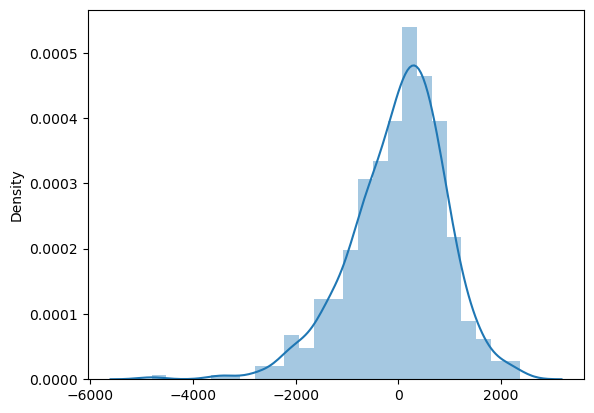

In [485]:
res = y_train - y_train_pred
sns.distplot(res)

##### Error terms are following normal distribution

#### R2 is 77% in training set

# Predection and evaluation on test set

In [486]:
#List of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

#Fit on data
df_test[num_vars] = sc.transform(df_test[num_vars])
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed   cnt  \
184   0        1           0  0.831783  0.769660  0.657364   0.084219  6043   
535   1        0           1  0.901354  0.842587  0.610133   0.153728  6211   
299   0        0           1  0.511964  0.496145  0.837699   0.334206  2659   
221   0        0           1  0.881625  0.795343  0.437098   0.339570  4780   
152   0        0           1  0.817246  0.741471  0.314298   0.537414  4968   

     season_spring  season_summar  ...  mt_dec  mt_feb  mt_jan  mt_jul  \
184              0              0  ...       0       0       0       1   
535              0              1  ...       0       0       0       0   
299              0              0  ...       0       0       0       0   
221              0              0  ...       0       0       0       0   
152              0              1  ...       0       0       0       0   

     mt_jun  mt_mar  mt_may  mt_nov  mt_oct  mt_sep  
184       0       0       0       0       0       0  
535       1       0       0       0       0       0  
299       0       0       0       0       1       0  
221       0       0       0       0       0       0  
152       1       0       0       0       0       0  

[5 rows x 30 columns]

In [487]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.700000    0.558718    0.532847    0.638221   
std      0.500809    0.187620    0.459303    0.233187    0.217401    0.148694   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.355429    0.344870    0.529197   
50%      0.000000    0.000000    1.000000    0.558172    0.544652    0.625590   
75%      1.000000    0.000000    1.000000    0.755981    0.713308    0.743798   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed          cnt  season_spring  season_summar  ...      mt_dec  \
count  220.000000   220.000000     220.000000     220.000000  ...  220.000000   
mean     0.313293  4560.559091       0.254545       0.263636  ...    0.086364   
std      0.159584  1904.968544       0.436599       0.441609  ...    0.281541   
min     -0.042808   441.000000       0.000000       0.000000  ...    0.000000   
25%      0.198843  3312.750000       0.000000       0.000000  ...    0.000000   
50%      0.300126  4582.500000       0.000000       0.000000  ...    0.000000   
75%      0.402718  5913.000000       1.000000       1.000000  ...    0.000000   
max      0.807474  8395.000000       1.000000       1.000000  ...    1.000000   

           mt_feb      mt_jan      mt_jul      mt_jun      mt_mar      mt_may  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.100000    0.077273    0.104545    0.095455    0.054545    0.086364   
std      0.300684    0.267633    0.306665    0.294512    0.227609    0.281541   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mt_nov      mt_oct      mt_sep  
count  220.000000  220.000000  220.000000  
mean     0.072727    0.086364    0.086364  
std      0.260281    0.281541    0.281541  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [488]:
y_test = df_test.pop('cnt')
X_test = df_test

In [489]:
X_test_lm = sm.add_constant(X_test)
X_test_lm.head()

const  yr  holiday  workingday      temp     atemp       hum  windspeed  \
184    1.0   0        1           0  0.831783  0.769660  0.657364   0.084219   
535    1.0   1        0           1  0.901354  0.842587  0.610133   0.153728   
299    1.0   0        0           1  0.511964  0.496145  0.837699   0.334206   
221    1.0   0        0           1  0.881625  0.795343  0.437098   0.339570   
152    1.0   0        0           1  0.817246  0.741471  0.314298   0.537414   

     season_spring  season_summar  ...  mt_dec  mt_feb  mt_jan  mt_jul  \
184              0              0  ...       0       0       0       1   
535              0              1  ...       0       0       0       0   
299              0              0  ...       0       0       0       0   
221              0              0  ...       0       0       0       0   
152              0              1  ...       0       0       0       0   

     mt_jun  mt_mar  mt_may  mt_nov  mt_oct  mt_sep  
184       0       0       0       0       0       0  
535       1       0       0       0       0       0  
299       0       0       0       0       1       0  
221       0       0       0       0       0       0  
152       1       0       0       0       0       0  

[5 rows x 30 columns]

In [490]:
# drop variables
X_test_lm = X_test_lm.drop(['atemp', 'season_spring', 'mt_oct', 'holiday', 'week_wed', 'mt_jun', 'week_thu', 'mt_mar', 'mt_jul', 'week_tue', 'week_mon', 'mt_may', 'week_sun', 'hum', 'temp'], axis=1)
print(X_test_lm.shape)
print(X_train_lm.shape)

(220, 15)
(510, 15)


In [491]:
# Predict
y_test_pred = lr.predict(X_test_lm)

In [492]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7304042136047886

#### R squared value
    -R-squared train data set: 0.774 [77%]
    -R-squared test  data set: 0.730 [73%]
    

In [493]:
round(lr.params,4)

const            4123.0092
yr               2143.0560
workingday        470.6983
windspeed       -2059.7739
season_summar     390.4272
season_winter     737.3738
week_sat          509.4609
wea_mist         -815.9410
wea_snow        -2730.0334
mt_aug            866.5315
mt_dec          -1465.5145
mt_feb          -1802.9317
mt_jan          -2418.0998
mt_nov          -1004.8707
mt_sep           1012.6612
dtype: float64

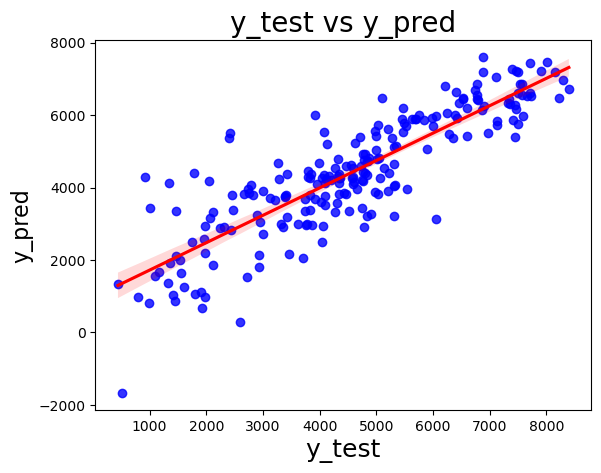

In [494]:
# Visualizing the fit on the test data
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_test_pred,fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

##### Significant variables to predict the demand for shared bikes
    -yr               
    -workingday        
    -windspeed       
    -season(summar, winter)       
    -week(saturday)          
    -weather(mist, snow)       
    -month(aug, dec, feb, jan, nov, sep)            
